In [3]:
import pymc as pm
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

seed = sum(map(ord, "Posterior Predictive"))
rng = np.random.default_rng(seed)

#https://www.youtube.com/watch?v=-G-7cd_EcoM&list=PL1Ma_1DBbE82OVW8Fz_6Ts1oOeyOAiovy&index=7
#https://www.pymc-labs.com/blog-posts/out-of-model-predictions-with-pymc/

In [4]:
with pm.Model() as m:
    # y ~ 2 * x
    x = pm.MutableData("x", [-2, -1, 0, 1, 2])
    y_obs = [-4, -1.7, -0.1, 1.8, 4.1]

    beta = pm.Normal("beta")
    y = pm.Normal("y", mu=beta * x, sigma=0.1, shape=x.shape, observed=y_obs)

    idata = pm.sample(random_seed=rng)

c:\Users\LucasAbreu\.conda\envs\pymc_env\Lib\site-packages\pymc\data.py:304: FutureWarning: MutableData is deprecated. All Data variables are now mutable. Use Data instead.
  warnings.warn(
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [beta]


c:\Users\LucasAbreu\.conda\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 32 seconds.


In [21]:
with m:
    pp = pm.sample_posterior_predictive(idata, random_seed=rng)

Sampling: [y]


c:\Users\LucasAbreu\.conda\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

<Axes: xlabel='y'>

c:\Users\LucasAbreu\.conda\envs\pymc_env\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
c:\Users\LucasAbreu\.conda\envs\pymc_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


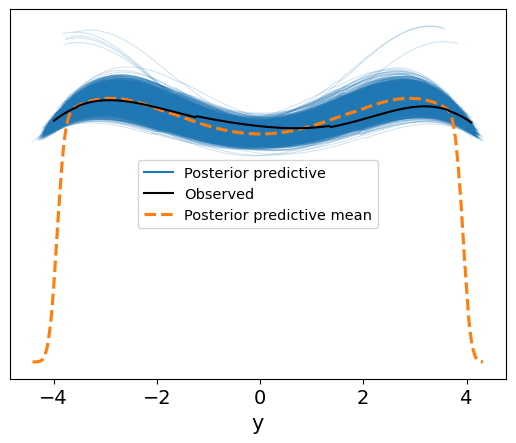

In [22]:
az.plot_ppc(pp)

In [23]:
with m:
    # Make predictions conditioned on new Xs
    pm.set_data({"x": [-1, 3, 5]})
    pp = pm.sample_posterior_predictive(idata, predictions=True, random_seed=rng)

Sampling: [y]


c:\Users\LucasAbreu\.conda\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

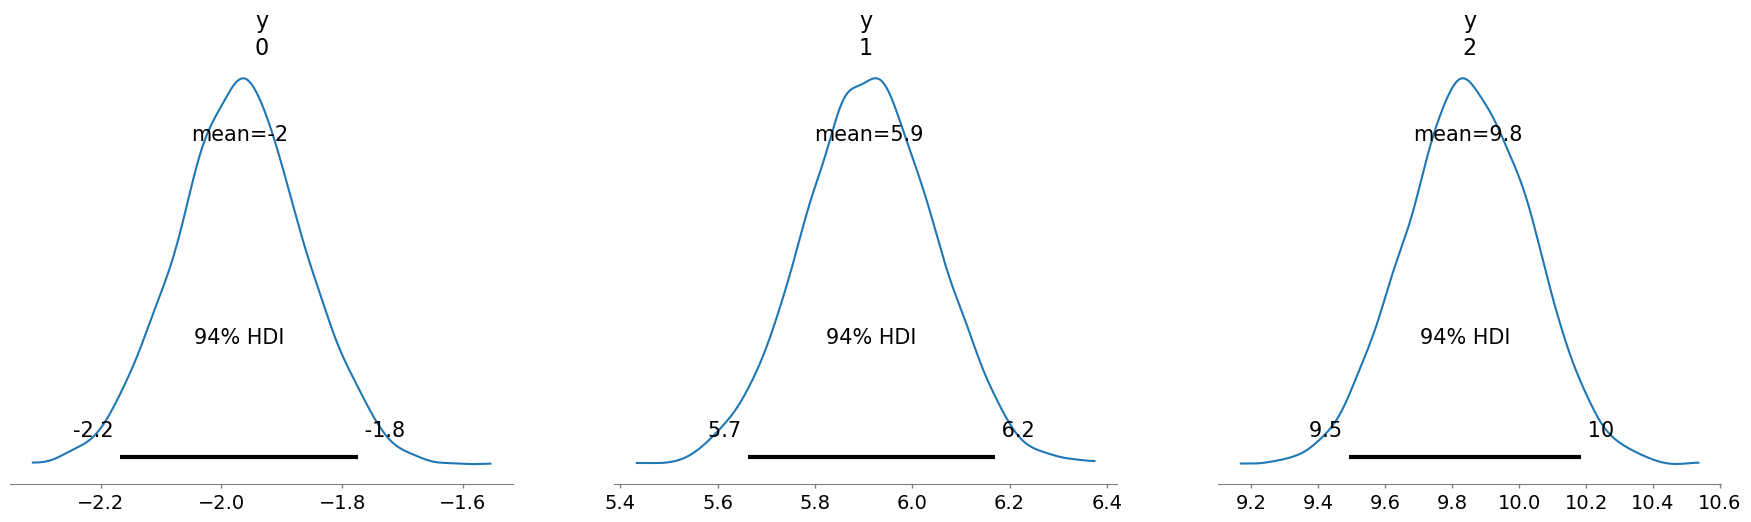

In [24]:
az.plot_posterior(pp, group="predictions");